# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: SVM
2. Accuracy Score: 58%
3. Cross Validation Score: 48%
4. Final Accuracy Score(After Hyperparamter Tunning): 60%
5. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROBLEM STATEMENT(Abalone Age)

Abalones are marine snails.They vary in size from 20 mm (0.8 in) (Haliotis pulcherrima) to 200 mm (8 in) while Haliotis rufescens is the largest of the genus at 12 in (30 cm). The shell of abalones is convex, rounded to oval in shape, and may be highly arched or very flattened. The shell of the majority of species has a small, flat spire and two to three whorls. The last whorl, known as the body whorl, is auriform, meaning that the shell resembles an ear, giving rise to the common name "ear shell".

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

# PROJECT CONTENTS
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Encoding
     - 3.2:Normal Distribution Check(Univariate Analysis)
     - 3.3:Scatter Plot Check(Bivariate Analysis)
     - 3.4:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.5:Outlier Check
     - 3.6:Skewness Check
     - 3.7:Categorical Variable(s) Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:RandomForest Regressor
     - 5.3:AdaBoost Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# Step 1 - ATTRIBUTES OF VARIABLES

1. Sex - This column shows the sexual category the Abalone
2. Length - The lenght of their shell in mm
3. Diameter - The a straight line passing from side to side through the center of the shell perpendicular to the length,            Measured in mm
4. Height - The measurement from base of shell to top. It is measured in mm
5. Whole weight - its whole body's relative mass or the quantity of matter contained by it. It is measured in grams
6. Shucked weight - its whole body's relative mass without the shell(weight of meat only). It is measured in grams
7. Viscera weight - its gut weight, measured in grams
8. Shell weight - its weight after being dried. Measured in grams
9. Rings - Cicular patterns round the shell. 

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#checking the first five rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#checking the last five rows
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
#picking 4 random samples
df.sample(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4032,I,0.485,0.365,0.090,0.6510,0.3165,0.1320,0.1800,8
3417,M,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.2650,9
3667,F,0.585,0.420,0.155,1.0340,0.4370,0.2225,0.3200,11
4022,M,0.720,0.545,0.195,1.7475,0.8215,0.3830,0.4705,11


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(4177, 9)

In [7]:
#checking for nature of datatypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
#Checking data full description
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Note that from the above the Sex column was not inluded in the df.describe method since its an object data type!

Now lets get its own description of the sex only

In [10]:
#Checking data full description of the Sex columns
df['Sex'].describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

The above shows that the MALE Abalone has the highest frequency(i.e Mode) which is 1528

In [11]:
#lets check the columns
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
#Checking for null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
#Checking for null values
df.isnull().sum().sum()

0

In [14]:
#Checking the goemetry of the Sex column
from collections import Counter
print("The Value Counts in Sex - ",Counter(df['Sex']))

The Value Counts in Sex -  Counter({'M': 1528, 'I': 1342, 'F': 1307})


In [15]:
#Checking the count
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

MALE = 1528, FEMALE = 1307, INFANT = 1342

# Step 2.4 - Observations


# The Dataset is made up of;
- 4177 rows and 9 columns
- 8 features and 1 Target

# Description of Features:
- All the features except 'Sex' have the following properties:
 - It has no null values
 - Its Datatypes are floating type
 - It is made up of Continous data
 - It will not require encoding since they are made up of numerical data
- The 'Sex' data column has the following properties:
 - it is made up of three Classes; Male=1528, Female = 1307 and Infant = 1342
 - It has no null values
 - It's Datatypes are Object type
 - It is made up of Categorical  data
 - It will require encoding since they are all Non-numerical data

# About the Target/Label:
Ring: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is an Interger type
- It is made up of Continuos data


**Since the target is made up of a continuos data hence this is a REGRESSION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 - Encoding
- We cannot perform Exploratory Data Analysis on Categorical Data so we have to first of all convert them to numerical data
- Here we shall adopt Label Encoder to transform the Sex column into Numerical Data!

In [16]:
#Initializing or instantiating....
lab_enc=LabelEncoder()

In [17]:
#Now fitting the encoding technique into the data in other for transformation to occur....
encoded=lab_enc.fit_transform(df['Sex'])#apply on the Sex feature only and store in encoded
encoded

array([2, 2, 0, ..., 2, 0, 2])

In [18]:
#Converting encoded data into series frame
pd.Series(encoded)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [19]:
#replacing the Non-numerical data in the sex column with numerical data
df['Sex']=encoded
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The resultant effect of this encoding process is that it has assigned numerical values in this format:
- Female(F) = 0
- Infant(I) = 1
- Male(M) = 2

Lets see the data distribution below:

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


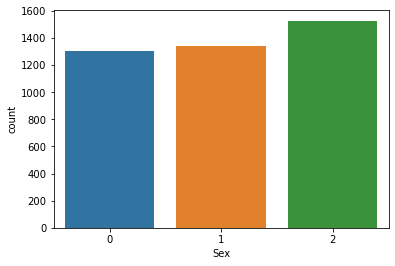

In [20]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

# Step 3.2 - Normal Distribution Check - Univariate Analysis

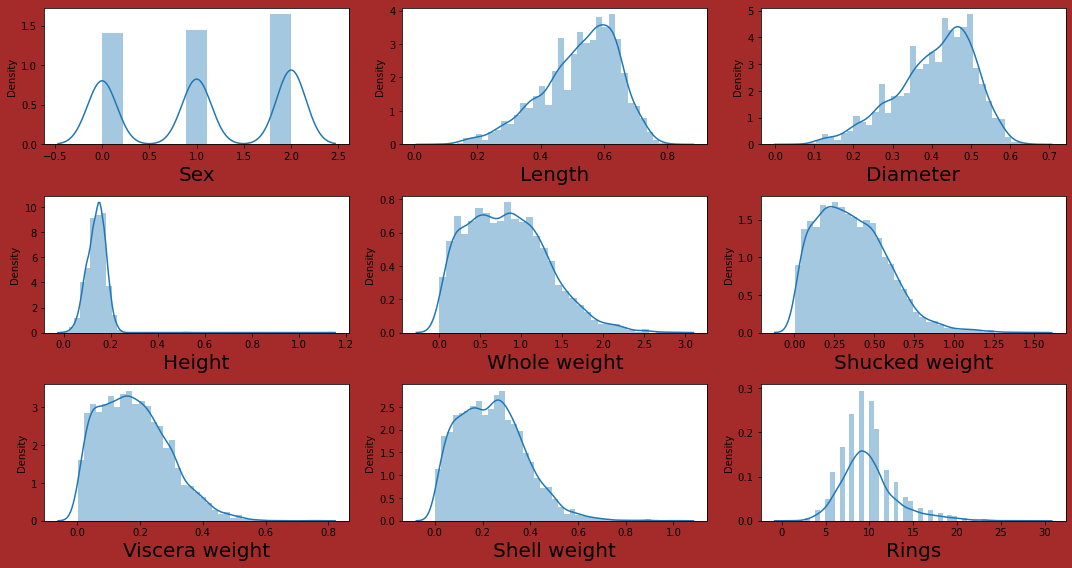

In [21]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='brown')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=9:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot 
- We can see that multiple features does not obey a normal distribution, the building blocks is not in tandem with a normalized curve
- The normal distribution of the 'Sex' columns has no contribution to our Model Building since its a categorical data
- The normal distribution of the 'Rings' columns also has no contribution to our Model Building since its the Target variable

# Step 3.3 - Scatter Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the features and the Label

In [22]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop('Rings',axis=1)
features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


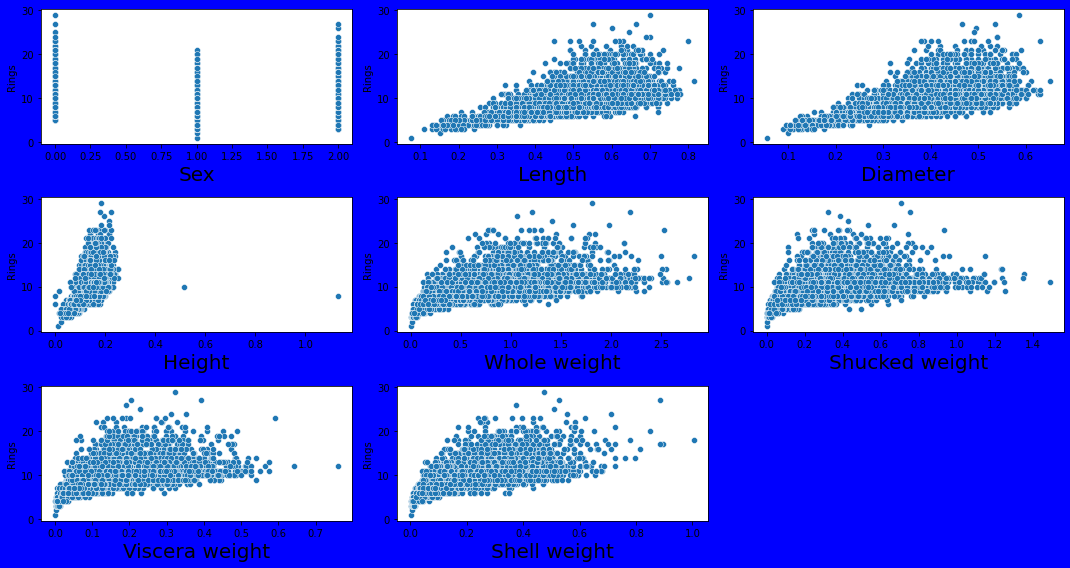

In [23]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Rings'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between the below features and the Label(Rings) except the 'Sex' column

# Step 3.4 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [24]:
#checking for general correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [25]:
#checking for correlation between each feature and Label
df.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

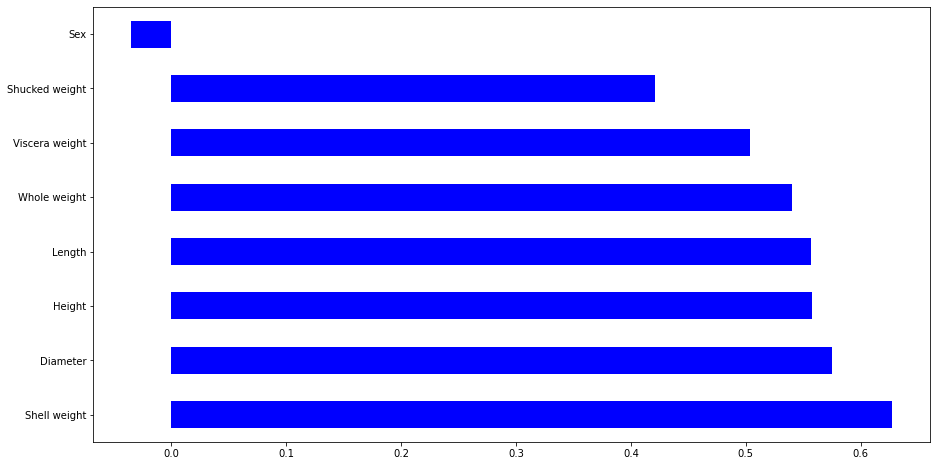

In [26]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

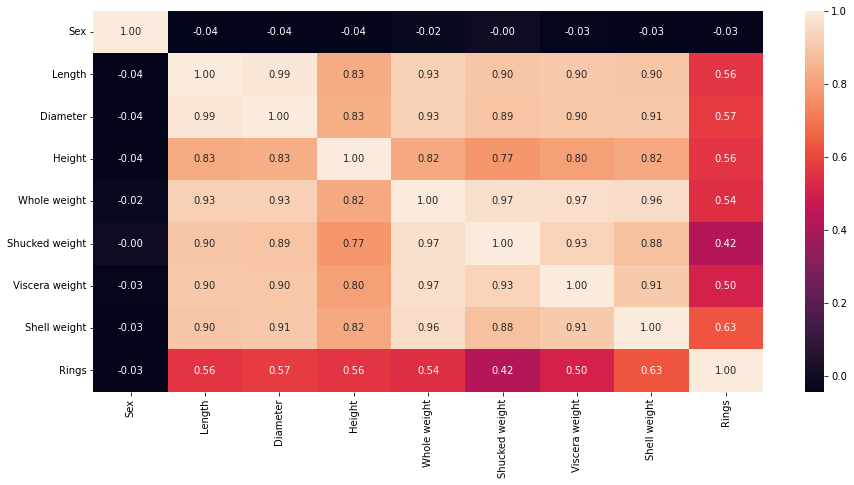

In [27]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

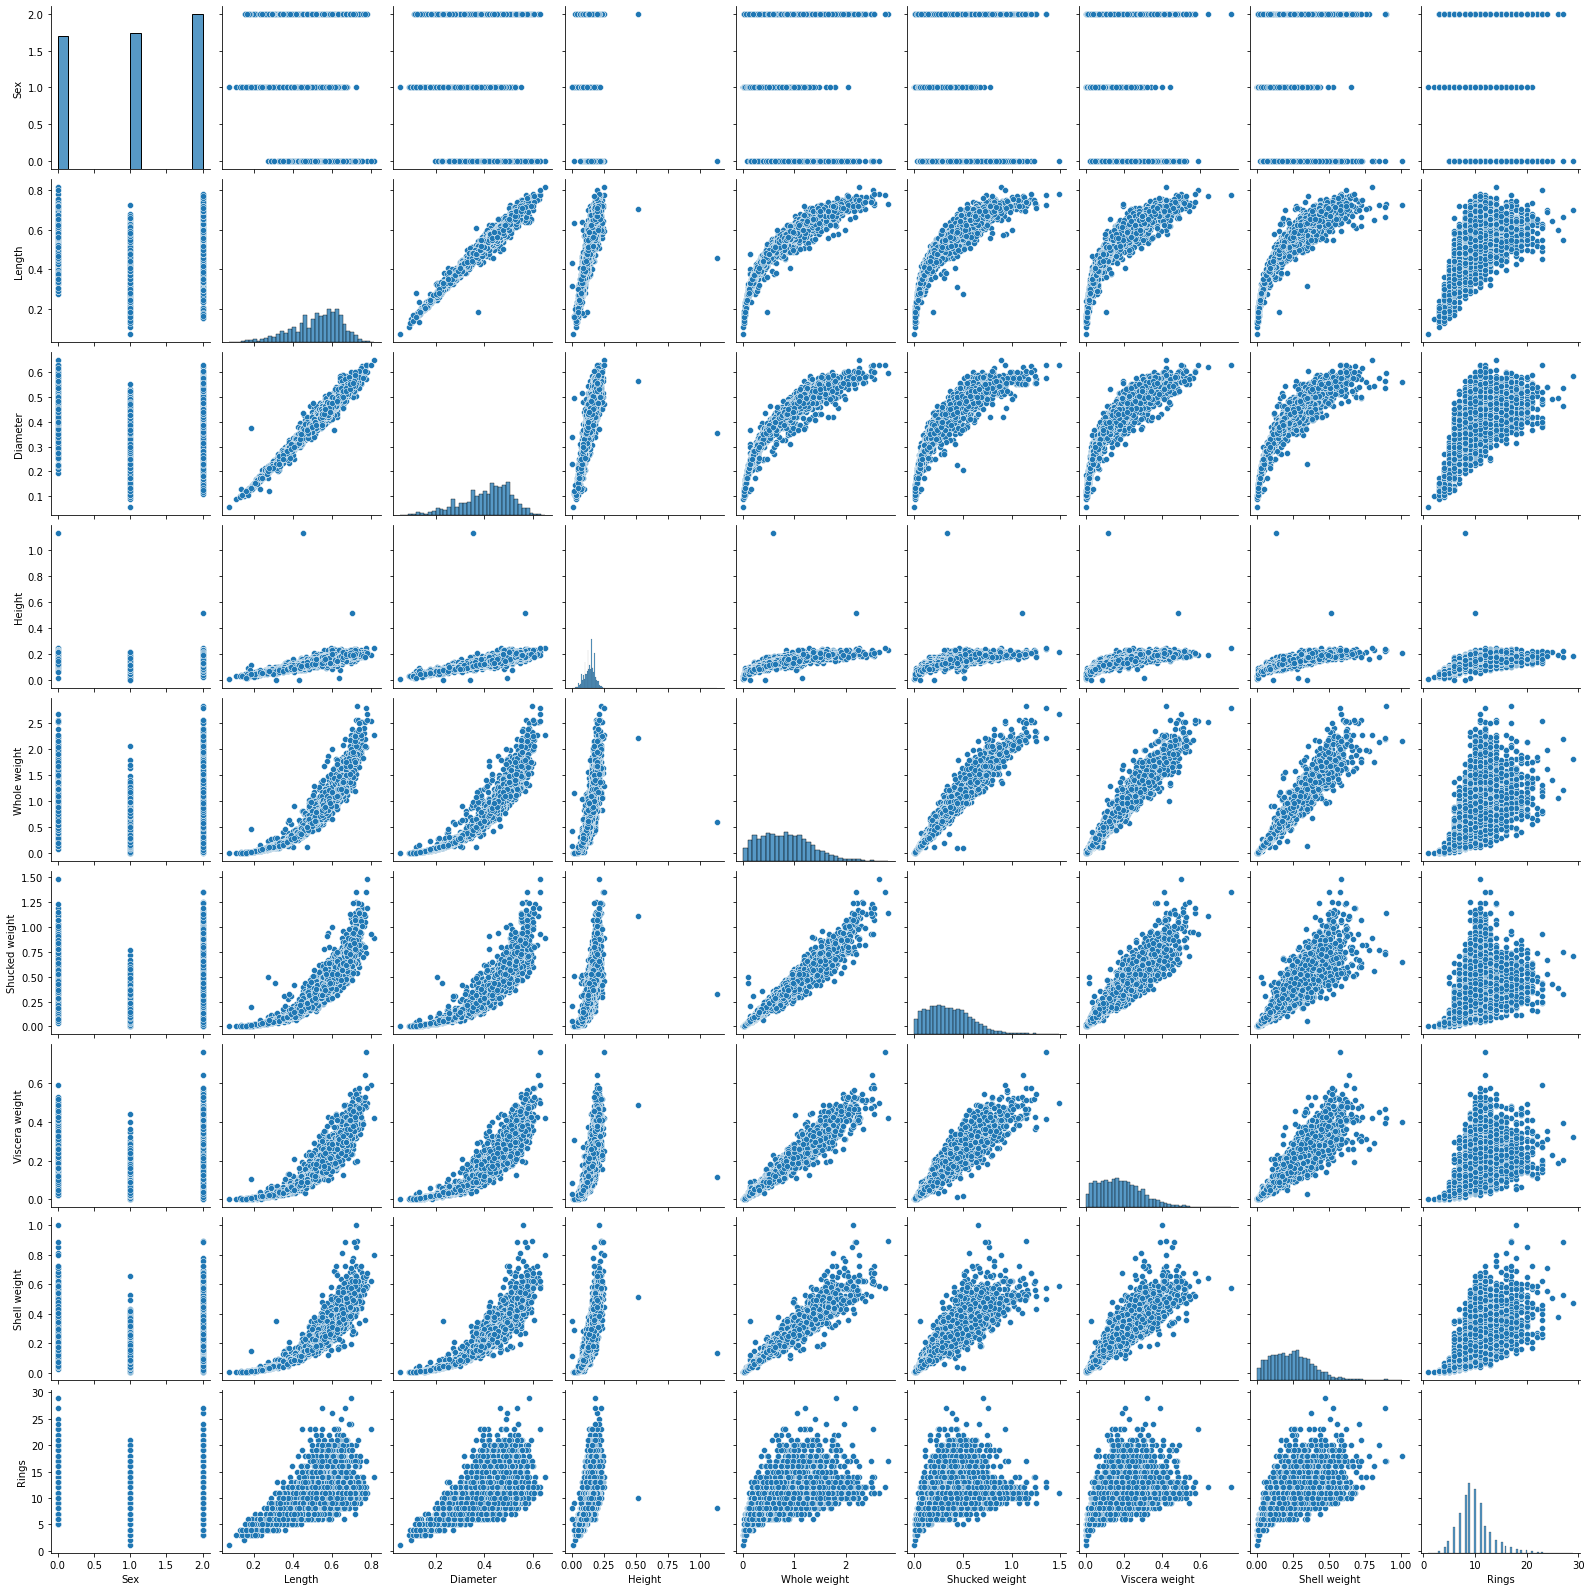

In [28]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

Hmmmm....we can see that most features share a 'direct relationship' between each other! But lets conlcude with our findings first:

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - Sex has a negative correlation of 3% with the target column which can be considered as poor bond
 - Length has a positive correlation of 57% with the target column which can be considered as a good bond
 - Diameter has a positive correlation of 57% with the target column which can be considered as a good bond
 - Height has a positive correlation of 56% with the target column which can be considered as a good bond
 - Whole weight has a negative correlation of 54% with the target column which can be considered as good bond
 - Shucked weight has a positive  correlation of 42% with the target column which can be considered as a good Bond
 - Viscera weight has a positive  correlation of 50% with the target column which can be considered as good bond
 - Shell weight has a positive  correlation of 63% with the target column which can be considered as very good bond
 
 
 - Feature with Maximum correlation = 'Shell weight'
 - Feature with Minimum correlation = 'Sex'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features have some noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.5 - Outlier Check

In [29]:
#Dropping Sex columns since its not involved during check of outliers
features_Continuos=features.drop('Sex',axis=1)
features_Continuos

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


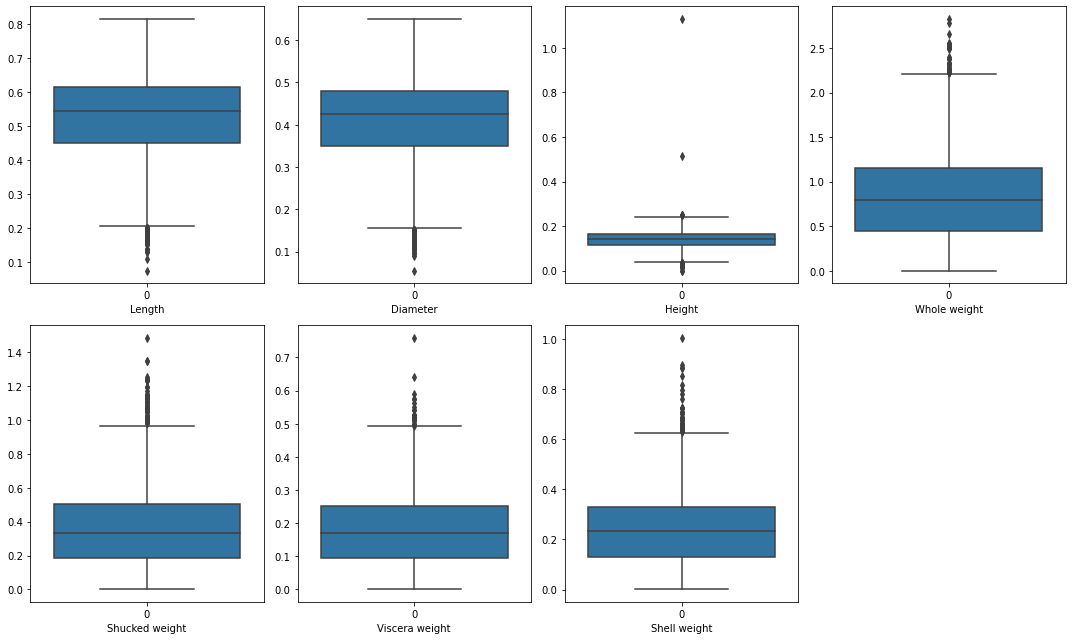

In [30]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features_Continuos:#triggering your for loop
    if graph<=8:#this was made 8 just to allow for 8 spaces
        plt.subplot(2,4,graph)#2,4 means arrange the graphs in 2-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=features_Continuos[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that all the Continuos features posses outliers, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.6 - Skewness Check

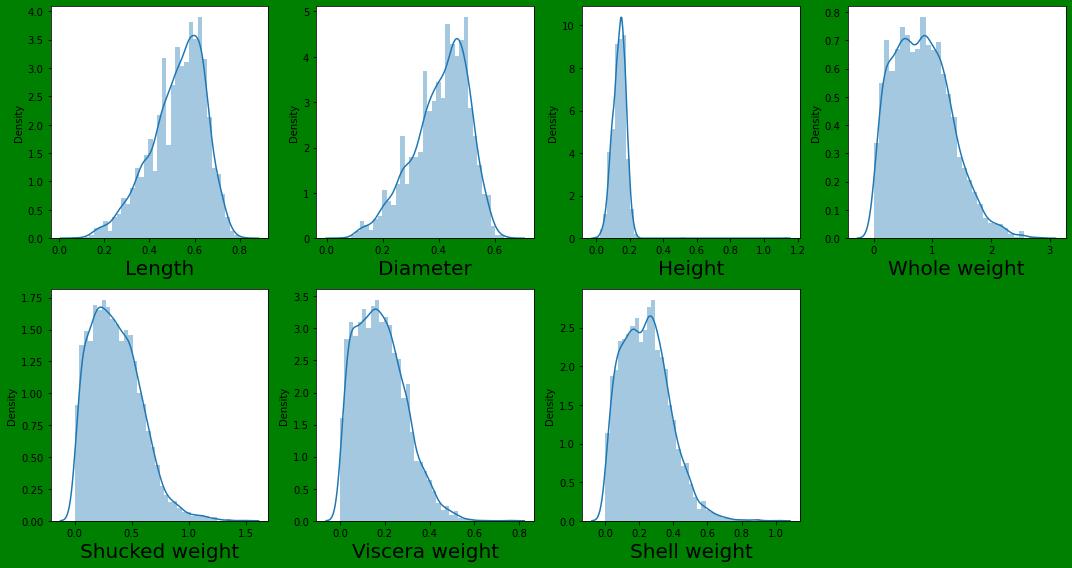

In [31]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features_Continuos:#triggering your for loop
    if plotnumber<=8:#since there are 8 features
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(features_Continuos[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [32]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
features_Continuos.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence majority of the Columns are having skewness:

- Length: -0.64
- Diameter: -0.61
- Height: 3.13
- Whole weight: 0.53
- Shucked weight: 0.72
- Viscera weight: 0.59
- Shell weight: 0.62

# Step 3.7  - Categorical Variable(s) Check

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


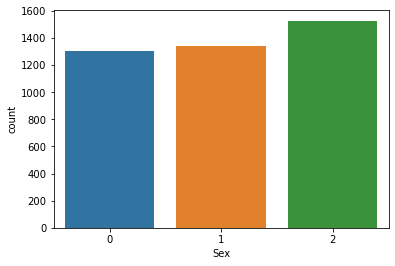

In [33]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

from the above graph the 'Sex' dependent variable has 3 classes of quality with the majority being Class 2 and minority Class 0 

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [34]:
#Recheking shape of original data
df.shape

(4177, 9)

In [35]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(4177, 9)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

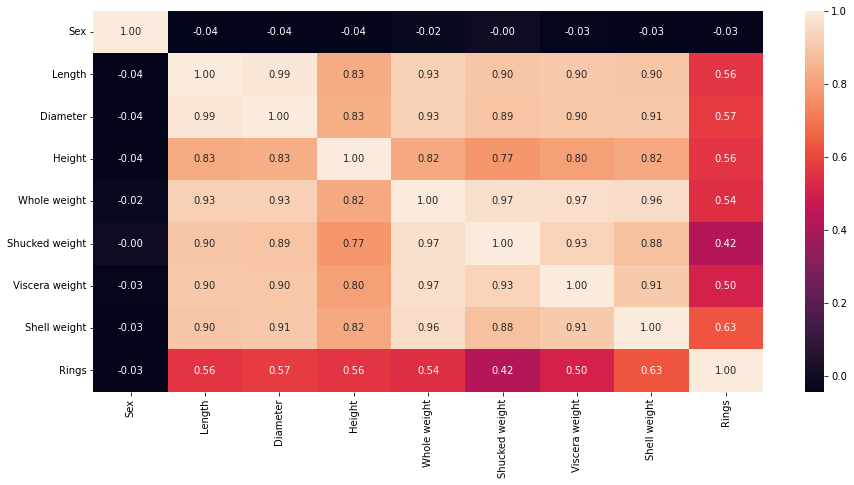

In [36]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

<AxesSubplot:>

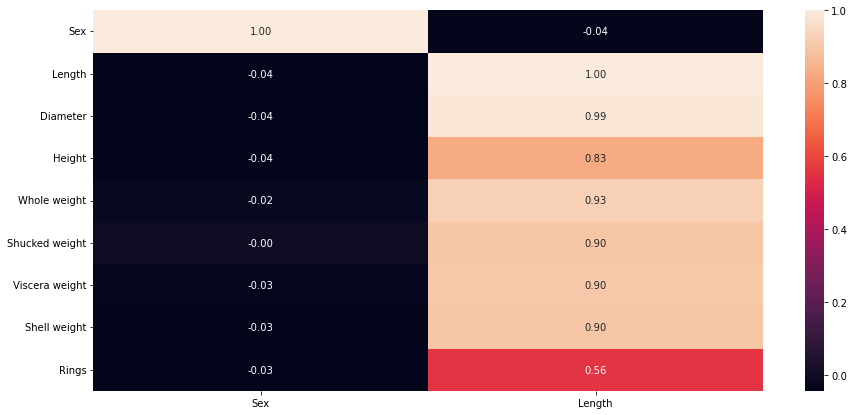

In [37]:
#plotting heatmaps in sub-pairs...
plt.figure(figsize=(15,7))
sns.heatmap(df.corr()[['Sex','Length']],annot=True, linewidth=0,linecolor='black',fmt='.2f')

<AxesSubplot:>

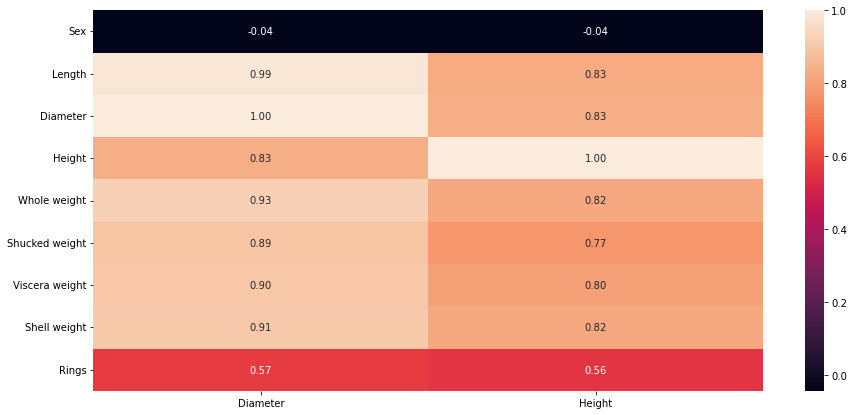

In [38]:
#plotting heatmaps in sub-pairs...
plt.figure(figsize=(15,7))
sns.heatmap(df.corr()[['Diameter','Height']],annot=True, linewidth=0,linecolor='black',fmt='.2f')

<AxesSubplot:>

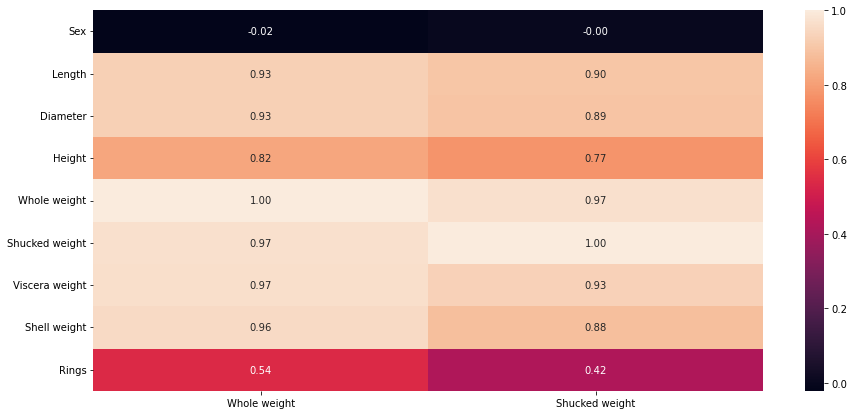

In [39]:
#plotting heatmaps in sub-pairs...
plt.figure(figsize=(15,7))
sns.heatmap(df.corr()[['Whole weight','Shucked weight']],annot=True, linewidth=0,linecolor='black',fmt='.2f')

<AxesSubplot:>

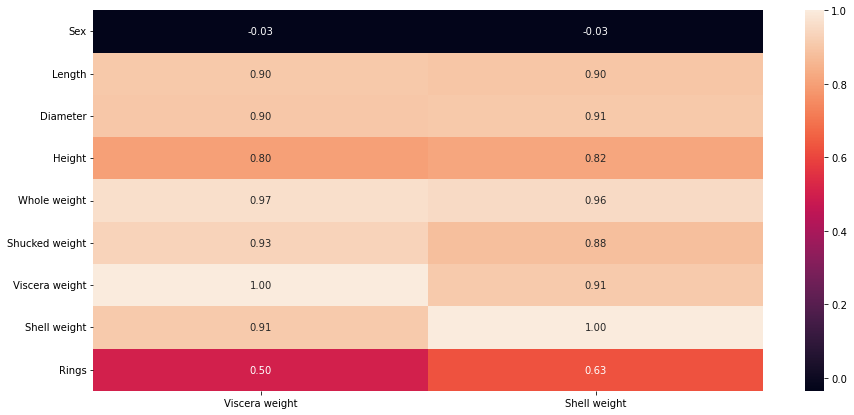

In [40]:
#plotting heatmaps in sub-pairs...
plt.figure(figsize=(15,7))
sns.heatmap(df.corr()[['Viscera weight','Shell weight']],annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that majority of the features have a strong correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [41]:
X=df.drop(columns=['Rings'])
Y=df['Rings']

In [42]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [43]:
#checking the shape
X_Scaled.shape

(4177, 8)

Now we shall treat the above shape as an array of numbers(tuple) where 4177 and 8 are the zeroth and first index respectively.

In [44]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [45]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(8) or (0,1,2,3,4,5,6,7), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 8. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [46]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘Rings’ )
vif

,vif,Features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


From the above vif dataframe,we are setting a vif threshold of 50, meaning any feature with Variance Inflation Factor greater than 50 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, we have to drop the following features:
 - Whole weight(vif=110)

In [47]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [48]:
#Dropping column as stated
df=df.drop(columns=['Whole weight'],axis=1)
df

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [49]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.773341,0.733627,0.410739,0.020571


In [50]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(4177, 8)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [51]:
#index number
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
         167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  238,
         238,  239,  270,  275,  277,  278,  294,  310,  313,  314,  334,
         351,  355,  358,  362,  375,  416,  417,  428,  431,  433,  469,
         478,  480,  501,  526,  526,  530,  572,  628,  673,  674,  675,
         678,  694,  696,  696,  719,  719,  720,  720,  744,  754,  756,
         811,  891,  891, 1048, 1051, 1193, 1197, 1199, 1202, 1204, 1206,
        1206, 1207, 1207, 1207, 1209, 1257, 1417, 1417, 1418, 1422, 1426,
        1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761,
        1762, 1762, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090,
        2108, 2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208,
        2209, 2274, 2275, 2305, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2624, 2624, 2625, 2709, 2710, 2710, 2810,
        2810, 2811, 2811, 2862, 2863, 

In [52]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (4177, 8)
New DataFrame (4030, 8)
total_dropped_rows 147


A Total of 147 outliers have been removed! Lets move on!

In [53]:
#Checking the new dataframe with non-outliers
df_new

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


Now we need to reset our data having removed outliers.....

In [54]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4025,4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4026,4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4027,4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4028,4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


In [55]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4025,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4026,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4027,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4028,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


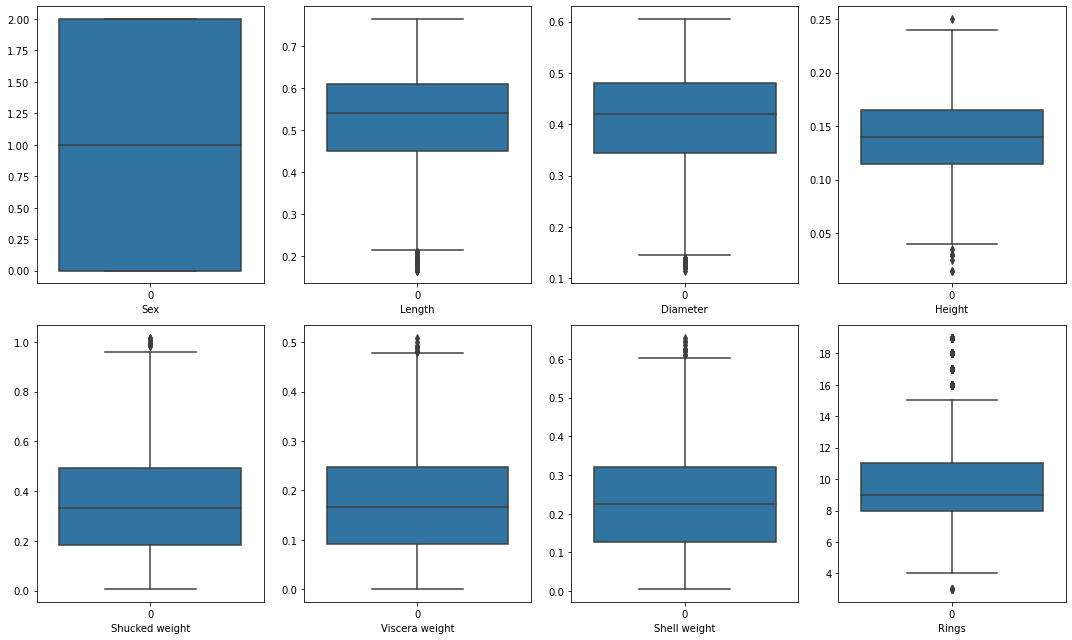

In [56]:
#reChecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=8:#this was made 9 just to allow for 9 spaces
        plt.subplot(2,4,graph)#2,4 means arrange the graphs in 2-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 8
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [57]:
#rechecking for skewness...
df_new.skew()

Sex              -0.095291
Length           -0.620056
Diameter         -0.596098
Height           -0.241963
Shucked weight    0.466125
Viscera weight    0.447399
Shell weight      0.356755
Rings             0.724396
dtype: float64

Since we don't apply skewness removal on categorical data, we need to create a sub data frame that does not include the Sex column to enable us execute Power Transformation!

In [58]:
#Extracting only continuos data and storing in cont_features
cont_features= ['Length', 'Diameter', 'Height', 'Shucked weight','Viscera weight', 'Shell weight']
cont_features=df_new[cont_features]
cont_features

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4025,0.565,0.450,0.165,0.3700,0.2390,0.2490
4026,0.590,0.440,0.135,0.4390,0.2145,0.2605
4027,0.600,0.475,0.205,0.5255,0.2875,0.3080
4028,0.625,0.485,0.150,0.5310,0.2610,0.2960


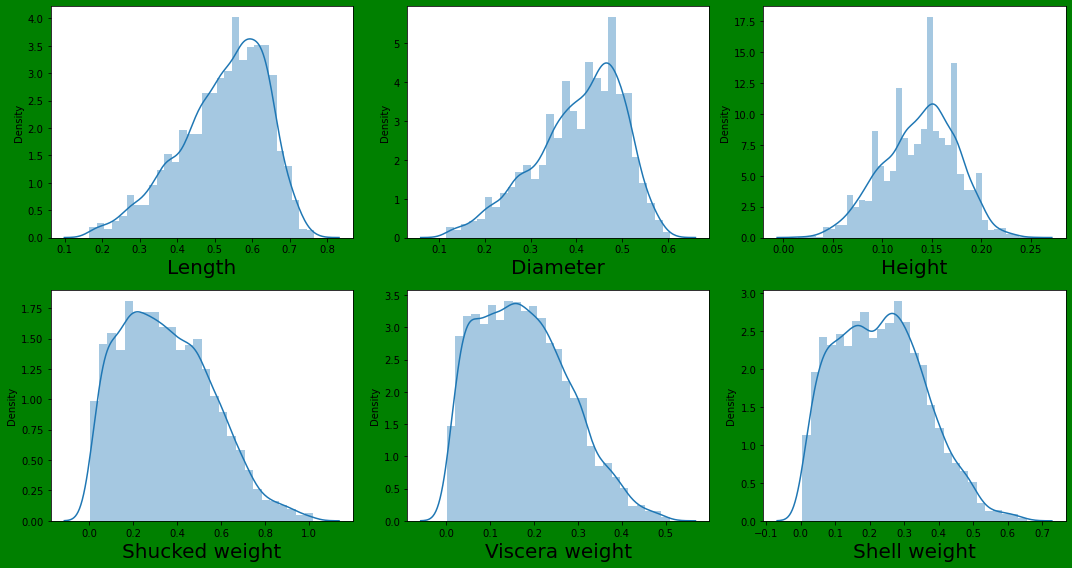

In [59]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in cont_features:#triggering your for loop
    if plotnumber<=6:#since there are 6 features
        ax = plt.subplot(2,3,plotnumber)#2,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(cont_features[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 6
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data alues in each features(except Sex column) should be zero!

In [60]:
#Firstly, replacing zero values in the features(stored in 'cont_features') with the mean (since they are all a continuos data)
cont_features['Length']=cont_features['Length'].replace(0,cont_features['Length'].mean())
cont_features['Diameter']=cont_features['Diameter'].replace(0,cont_features['Diameter'].mean())
cont_features['Height']=cont_features['Height'].replace(0,cont_features['Height'].mean())
cont_features['Shucked weight']=cont_features['Shucked weight'].replace(0,cont_features['Shucked weight'].mean())
cont_features['Viscera weight']=cont_features['Viscera weight'].replace(0,cont_features['Viscera weight'].mean())
cont_features['Shell weight']=cont_features['Shell weight'].replace(0,cont_features['Shell weight'].mean())

Let lets go ahead and apply Power Transformation!

In [61]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [62]:
#extracting the columns that are skewed
data=['Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera weight','Shell weight']

In [63]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [64]:
df_new

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,-0.684280,-0.543483,-1.159125,-0.541050,-0.688002,-0.586460,15
1,2,-1.411838,-1.401262,-1.280591,-1.311683,-1.333318,-1.333101,7
2,0,-0.046875,0.036247,-0.129210,-0.363004,-0.240570,-0.080762,9
3,2,-0.799429,-0.543483,-0.396575,-0.592424,-0.539928,-0.542657,10
4,1,-1.530871,-1.474558,-1.518821,-1.379167,-1.452203,-1.483496,7
...,...,...,...,...,...,...,...,...
4025,0,0.288080,0.388744,0.713963,0.216016,0.688496,0.226185,11
4026,2,0.542955,0.268266,-0.129210,0.533118,0.472584,0.313677,10
4027,2,0.648677,0.703412,1.938203,0.899009,1.085749,0.661471,9
4028,0,0.922685,0.834817,0.284571,0.921191,0.873447,0.575607,10


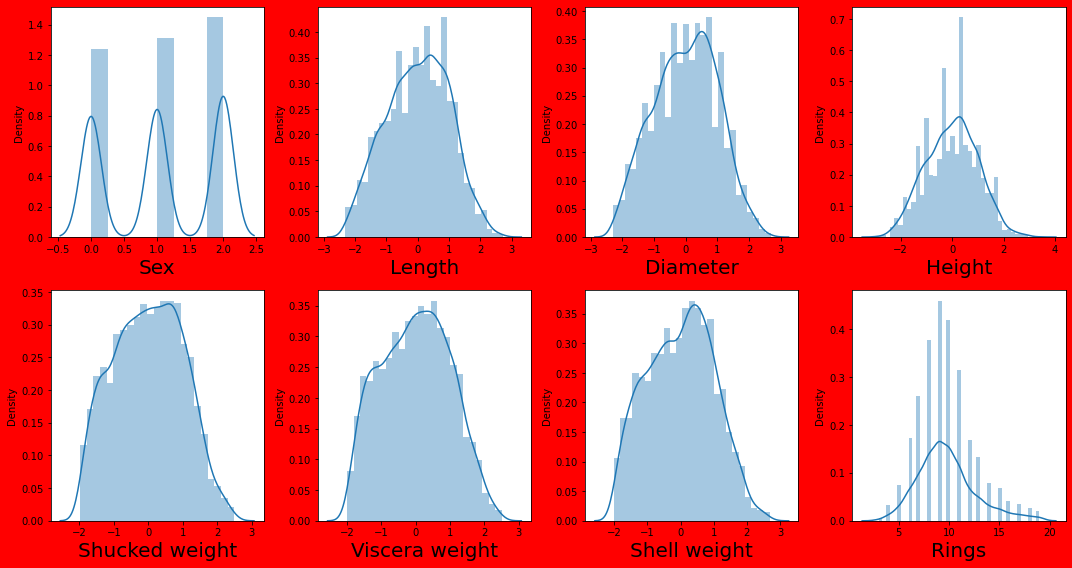

In [65]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=8:#since there are 6 features
        ax = plt.subplot(2,4,plotnumber)#2,4 means arrange the graphs in 2-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 8
plt.tight_layout()#This is just to show you data in a compact form. 

From the above we can see that skewness has been removed!

NOTE:
- The Sex column is not considered for skewness since its Categorical data
 
- The Ring column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [66]:
#seperation
X=df_new.drop(columns=['Rings'])
Y=df_new['Rings']

# Transforming data into standard normal distribution

In [67]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 1.15924809, -0.6842802 , -0.54348288, ..., -0.54105036,
        -0.68800248, -0.5864596 ],
       [ 1.15924809, -1.41183849, -1.40126245, ..., -1.31168284,
        -1.33331821, -1.33310063],
       [-1.28542476, -0.04687522,  0.03624732, ..., -0.36300442,
        -0.24056968, -0.08076182],
       ...,
       [ 1.15924809,  0.64867694,  0.70341241, ...,  0.89900948,
         1.08574926,  0.66147128],
       [-1.28542476,  0.9226846 ,  0.83481697, ...,  0.92119096,
         0.87344681,  0.57560662],
       [ 1.15924809,  1.96407014,  1.84891501, ...,  2.30470383,
         1.72464463,  1.849481  ]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [68]:
#reconfirming that mean is 0
X_Scaled.mean()

1.8638838158896637e-17

In [69]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 5 - MODEL BUILDING

# Step 5.1 - Linear Regression

# Best Random State

In [78]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  46.29 and 50.47 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.58 and 1.5 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.47 and 1.5 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.11 and 1.23 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  49.42 and 49.62 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.49 and 1.53 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.84 and 1.53 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.96 and 1.24 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  47.59 and 50.21 respectively
At random state of :-  2 the mean absolute error of T

The best accuracy is 54.71% at random state 40

We have found best_random state value as 40. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=40,test_size=0.20)

In [71]:
x_train.shape

(3224, 7)

In [72]:
x_test.shape

(806, 7)

In [73]:
y_train.shape

(3224,)

In [74]:
y_test.shape

(806,)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [75]:
lm=LinearRegression()#Initializing...
lm.fit(x_train,y_train)#Training...
pred_test=lm.predict(x_test)#Prediciting using test data...
pred_train=lm.predict(x_train)#Prediciting using training data...
Test_Accuracy_lm= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_lm= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_lm= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_lm= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_lm= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_lm= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_lm= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_lm= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_lm)#printing mean absolute error
print("Test_MSE ", Test_mse_lm)#printing mean squared error
print("Test_RMSE ", Test_rmse_lm)#printing root mean squared error

Test_Accuracy  54.71
Test_MAE  1.4548522262180064
Test_MSE  3.527758401507196
Test_RMSE  1.8782327868257427


LinearRegression is producing average accuracy 54.71% which is fair. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [76]:
#Validation accuracy
vac=cross_val_score(lm,X,Y,cv=7)
CV_Score_lm=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lm)

[0.40426889 0.49950546 0.12728181 0.52708973 0.48628141 0.48333061
 0.41839812]
Cross Validation Score is  0.42087943232055924


# Difference between Accuracy Score and Cross Validation Score

In [77]:
Test_Accuracy_lm

0.5470593296283561

In [78]:
CV_Score_lm

0.42087943232055924

In [79]:
lm_Acc_vs_CV_Score=np.abs(Test_Accuracy_lm-CV_Score_lm)
print("Difference between Accuracy and Cross Validation Score = ",lm_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.12617989730779688


From the above you can see that difference between Accuracy and Cross Validation score is low (0.126) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - RandomForest Regressor

# Best Random State

In [89]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


At random state of :- 0 Testing Accuracy and Training Accuracy are:-  51.48 and 93.37 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.46 and 0.54 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.03 and 0.54 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.01 and 0.73 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  53.63 and 93.22 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.41 and 0.55 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.52 and 0.55 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.88 and 0.74 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  50.22 and 93.29 respectively
At random state of :-  2 the mean absolute error of

The best accuracy is 57.53% at random state 74

We have found best_random state value as 74. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [82]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=74,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [83]:
rf=LinearRegression()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

Test_Accuracy  52.51
Test_MAE  1.5952080535133704
Test_MSE  4.4283059182363145
Test_RMSE  2.104354038235086


RandomForest Classifier is producing fair accuracy = 52.51%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [84]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.36443905 0.24298855 0.48472274 0.49413306 0.44651148]
Cross Validation Score is  0.4065589754641197


# Difference between Accuracy Score and Cross Validation Score

In [85]:
Test_Accuracy_rf

0.5250782938433955

In [86]:
CV_Score_rf

0.4065589754641197

In [87]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.11851931837927587


From the above you can see that difference between Accuracy and Cross Validation score is low (0.120) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - AdaBoost Classifier

# Best Random State 

In [98]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  35.68 and 41.05 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.88 and 1.82 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  5.35 and 1.82 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.31 and 1.35 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  38.44 and 43.1 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.8 and 1.79 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  4.68 and 1.79 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  2.16 and 1.34 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  37.28 and 41.14 respectively
At random state of :-  2 the mean absolute error of T

The best accuracy is 49.91% at random state 74

We have found best_random state value as 74. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=74,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [89]:
ada=AdaBoostRegressor()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ada= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ada= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ada= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ada= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ada= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ada= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ada= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ada)#printing mean absolute error
print("Test_MSE ", Test_mse_ada)#printing mean squared error
print("Test_RMSE ", Test_rmse_ada)#printing root mean squared error

Test_Accuracy  47.52
Test_MAE  1.7988183456013487
Test_MSE  4.893464710820325
Test_RMSE  2.2121176982295325


AdaBoostClassifier is producing good accuracy = 47.52%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [90]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[ 0.48922386 -0.58170316  0.42662346  0.32404509  0.32147111]
Cross Validation Score is  0.19593207220713998


# Difference between Accuracy Score and Cross Validation Score

In [91]:
Test_Accuracy_ada

0.4751914948085789

In [92]:
CV_Score_ada

0.19593207220713998

In [93]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.27925942260143893


From the above you can see that difference between Accuracy and Cross Validation score is low (0.279) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - GradientBoosting Classifier

# Best Random State

In [106]:
#Using LinearRegression to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  51.37 and 63.76 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.46 and 1.27 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.04 and 1.27 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.01 and 1.13 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  55.61 and 62.11 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.38 and 1.31 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.37 and 1.31 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.84 and 1.14 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  52.27 and 63.59 respectively
At random state of :-  2 the mean absolute error of

The best accuracy is 58.98% at random state 40

We have found best_random state value as 40. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=40,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [95]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

Test_Accuracy  58.97
Test_MAE  1.3609789695906787
Test_MSE  3.1955924634318524
Test_RMSE  1.787622013578892


GradientBoosting Classifier is producing good accuracy = 58.97%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [96]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.40916573 0.34985418 0.50627694 0.54947984 0.52517378]
Cross Validation Score is  0.46799009154952237


# Difference between Accuracy Score and Cross Validation Score

In [97]:
Test_Accuracy_gb

0.5897072225799238

In [98]:
CV_Score_gb

0.46799009154952237

In [99]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.12171713103040144


From the above you can see that difference between Accuracy and Cross Validation score is low (0.121) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - XGBoost Classifier

# Best Random State

In [100]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  47.11 and 93.32 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.5 and 0.54 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.4 and 0.54 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.1 and 0.73 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  48.87 and 93.56 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.46 and 0.53 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.88 and 0.53 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.97 and 0.73 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  45.1 and 92.98 respectively
At random state of :-  2 the mean absolute error of Tes

The best accuracy is 55.5% at random state 74

We have found best_random state value as 74. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [101]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=74,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [102]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

Test_Accuracy  55.5
Test_MAE  1.5007549772783189
Test_MSE  4.149729219469845
Test_RMSE  2.0370884171949544


XGBoost Classifier is producing good accuracy = 55.5%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [103]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.38552035 0.18274175 0.43294206 0.50328908 0.46917111]
Cross Validation Score is  0.3947328719063992


# Difference between Accuracy Score and Cross Validation Score

In [104]:
Test_Accuracy_xgb

0.5549547575558076

In [105]:
CV_Score_xgb

0.3947328719063992

In [106]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.16022188564940837


From the above you can see that difference between Accuracy and Cross Validation score is low (0.160) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - ExtraTrees Regressor

# Best Random State

In [120]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  50.8 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.47 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.09 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.02 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  53.8 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.42 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.51 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.87 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  49.96 and 100.0 respectively
At random state of :-  2 the mean absolute error of Testing

The best accuracy is 56.33% at random state 175

We have found best_random state value as 175. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [107]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=175,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [108]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

Test_Accuracy  56.87
Test_MAE  1.4030521091811416
Test_MSE  3.5346062034739454
Test_RMSE  1.8800548405495903


ExtraTress Classifier is producing good accuracy = 56.88%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [109]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.39254259 0.29961958 0.48053701 0.51865793 0.4815203 ]
Cross Validation Score is  0.4345754826909328


# Difference between Accuracy Score and Cross Validation Score

In [110]:
Test_Accuracy_ex

0.5686907875716029

In [111]:
CV_Score_ex

0.4345754826909328

In [112]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.13411530488067003


From the above you can see that difference between Accuracy and Cross Validation score is low (0.134) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - Support Vector Regressor(SVR)

# Best Random State

In [127]:
#Using Support Vector Regressor to get the best Random state
from sklearn.svm import SVR
svr=SVR()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  50.56 and 54.74 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1.45 and 1.36 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  4.11 and 1.36 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  2.03 and 1.16 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  54.83 and 53.72 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1.34 and 1.38 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  3.43 and 1.38 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1.85 and 1.18 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  50.26 and 54.87 respectively
At random state of :-  2 the mean absolute error of

The best accuracy is 58.11% at random state 40

We have found best_random state value as 40. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=40,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [114]:
sv=SVR()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_sv= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_sv= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_sv= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_sv= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_sv= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_sv= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_sv= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_sv)#printing mean absolute error
print("Test_MSE ", Test_mse_sv)#printing mean squared error
print("Test_RMSE ", Test_rmse_sv)#printing root mean squared error

Test_Accuracy  58.11
Test_MAE  1.3241526676282007
Test_MSE  3.2626859542592017
Test_RMSE  1.8062906616209922


Support Vector is producing good accuracy = 58.11%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [115]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.32202692 0.49154376 0.49123093 0.53986098 0.55422209]
Cross Validation Score is  0.47977693756463163


# Difference between Accuracy Score and Cross Validation Score

In [116]:
Test_Accuracy_sv

0.5810928654573017

In [117]:
CV_Score_sv

0.47977693756463163

In [118]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.10131592789267002


From the above you can see that difference between Accuracy and Cross Validation score is low(0.101) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 7 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [119]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','Random Forest Regressor','Ada Boosting Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor','SVR'],'Accuracy_Score' : [Test_Accuracy_lm,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lm,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lm_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score],'MAE':[Test_mae_lm,Test_mae_rf,Test_mae_ada,Test_mae_gb,Test_mae_xgb,Test_mae_ex,Test_mae_sv],'MSE':[Test_mse_lm,Test_mse_rf,Test_mse_ada,Test_mse_gb,Test_mse_xgb,Test_mse_ex,Test_mse_sv],'RMSE':[Test_rmse_lm,Test_rmse_rf,Test_rmse_ada,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex,Test_rmse_sv]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,Linear Regression,0.547059,0.420879,0.126180,1.454852,3.527758,1.878233
1,Random Forest Regressor,0.525078,0.406559,0.118519,1.595208,4.428306,2.104354
2,Ada Boosting Regressor,0.475191,0.195932,0.279259,1.798818,4.893465,2.212118
3,Gradient Boosting Regressor,0.589707,0.467990,0.121717,1.360979,3.195592,1.787622
4,XgBoost,0.554955,0.394733,0.160222,1.500755,4.149729,2.037088
5,Extra Trees Regressor,0.568691,0.434575,0.134115,1.403052,3.534606,1.880055
6,SVR,0.581093,0.479777,0.101316,1.324153,3.262686,1.806291


In [120]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
3,Gradient Boosting Regressor,59.0,47.0,0.121717,1.360979,3.195592,1.787622
6,SVR,59.0,48.0,0.101316,1.324153,3.262686,1.806291
5,Extra Trees Regressor,57.0,44.0,0.134115,1.403052,3.534606,1.880055
4,XgBoost,56.0,40.0,0.160222,1.500755,4.149729,2.037088
0,Linear Regression,55.0,43.0,0.126180,1.454852,3.527758,1.878233
1,Random Forest Regressor,53.0,41.0,0.118519,1.595208,4.428306,2.104354
2,Ada Boosting Regressor,48.0,20.0,0.279259,1.798818,4.893465,2.212118


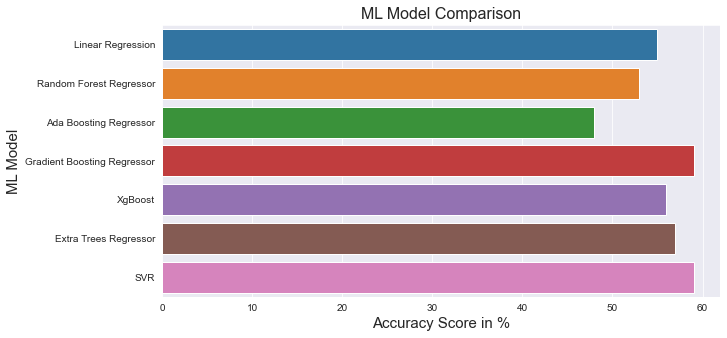

In [121]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Gradient Boosting(58.97%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [122]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
6,SVR,59.0,48.0,0.101316,1.324153,3.262686,1.806291
1,Random Forest Regressor,53.0,41.0,0.118519,1.595208,4.428306,2.104354
3,Gradient Boosting Regressor,59.0,47.0,0.121717,1.360979,3.195592,1.787622
0,Linear Regression,55.0,43.0,0.126180,1.454852,3.527758,1.878233
5,Extra Trees Regressor,57.0,44.0,0.134115,1.403052,3.534606,1.880055
4,XgBoost,56.0,40.0,0.160222,1.500755,4.149729,2.037088
2,Ada Boosting Regressor,48.0,20.0,0.279259,1.798818,4.893465,2.212118


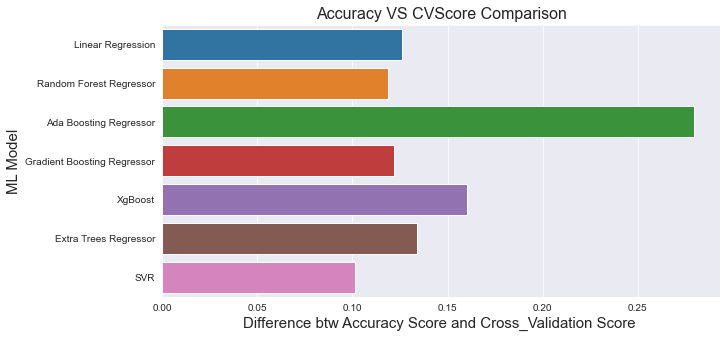

In [123]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is Support Vector Regressor!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
 - The Model with least difference(0.1) between Accuracy Score(r2 score) and Cross Validation Score is SUPPORT VECTOR REGRESSOR!
 - It has a low Root Mean Square Error(RMSE): 1.8

# Hence Optimum Machine Model Chosen = SUPPORT VECTOR MACHINE(SVM) REGRESSION MODEL!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [ ]:
sv=SVR()

In [124]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf'],'degree':[2,3,4]}

In [125]:
#Gridsearch
gridsearch = GridSearchCV(sv, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [126]:
#Get best hyperparameters
gridsearch.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

Now lets use the best parameters.....

In [360]:
#Instantiating using the best parameters...
sv=SVR(C=7,degree=2,gamma=0.1,kernel='rbf',epsilon=1.5,cache_size=200,tol=0.01)

In [361]:
#fitting the model...
sv.fit(x_train,y_train)

SVR(C=7, degree=2, epsilon=1.5, gamma=0.1, tol=0.01)

In [362]:
pred_test=sv.predict(x_test)

In [363]:
metrics.r2_score(y_test,pred_test)

0.5953419790994094

From the above we can see:
- Final Accuracy is 60% and RMSE is 1.8 
- That the SVM Regressor has a low RMSE

HENCE WE CAN CONCLUDE OUR MODEL IS GOOD!!

# Step 8 - MODEL SAVING

In [365]:
filename='Machine_Model_Project_Abalone'
pickle.dump(sv,open(filename,'wb'))